# Setting up the Hamlet dataset

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# dataset setup
url_hamlet = 'https://github.com/nrennie/shakespeare/blob/dc971d88d096937536fde8d69d9369ffa5f193b2/data/hamlet.csv?raw=true'
df_hamlet = pd.read_csv(url_hamlet)

## Finding the character that had the most line

In [79]:
characters = df_hamlet["character"]

character_count = df_hamlet.pivot_table(columns=['character'], aggfunc='size')
character_count.sort_values(ascending=False)
# transforming character count pivot_table (series) into a dataframe to graph easier
character_count_series = pd.Series(character_count, name="line count")
df_hamlet_lc = character_count_series.to_frame()
df_hamlet_lc = df_hamlet_lc.sort_values('line count',ascending=False)
df_hamlet_lc = df_hamlet_lc.reset_index()
display(df_hamlet_lc)

,character,line count
0,Hamlet,1495
1,King Claudius,546
2,Lord Polonius,355
3,Horatio,289
4,[stage direction],206
5,Laertes,206
6,Ophelia,173
7,Queen Gertrude,157
8,Ghost,95
9,First Clown,94


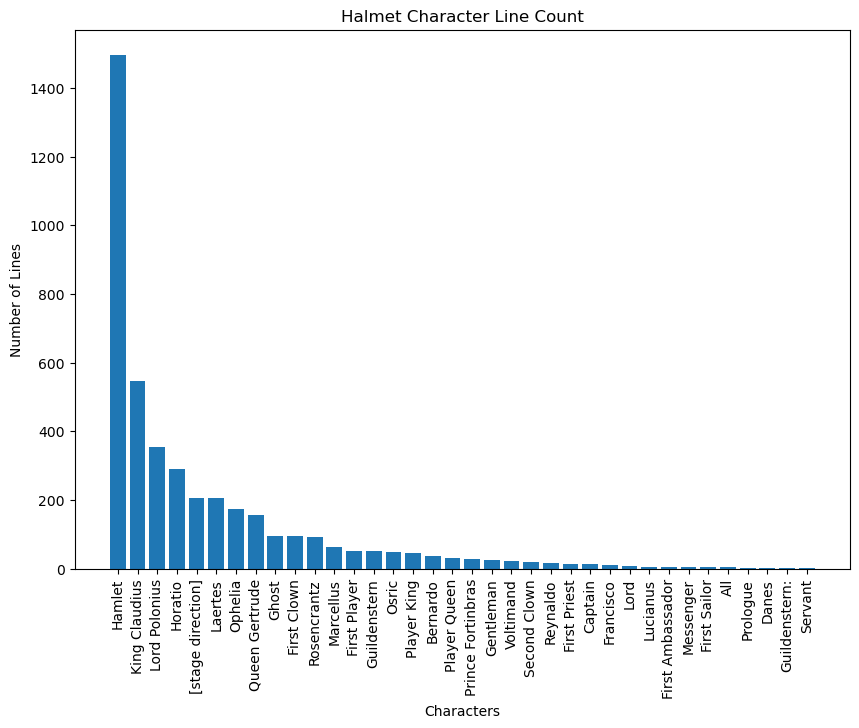

In [80]:
characters = df_hamlet_lc['character']
line_count = df_hamlet_lc['line count'] 

fig = plt.figure(figsize =(10, 7))

plt.bar(characters, line_count)
# Add title and axis names
plt.title("Halmet Character Line Count")
plt.xlabel('Characters')
plt.xticks(rotation=90)
plt.ylabel('Number of Lines')

plt.show()

## Let's on look at the only line of the Servant

In [69]:
df_line = df_hamlet.loc[df_hamlet['character'] == 'Servant'].reset_index()
line = df_line['dialogue'].loc[0]

print(line)

Sailors, sir: they say they have letters for you.


## Let's now look at what lines were for All

In [99]:
# grab All lines from dataframe
df_line = df_hamlet.loc[df_hamlet['character'] == 'All']
line = df_line['dialogue'].reset_index().drop(['index'], axis = 1)


df_all = df_hamlet.loc[df_hamlet['character'] == 'All'].reset_index().drop(['index'],axis = 1)
display(df_all)

,act,scene,character,dialogue,line_number
0,Act I,Scene II,All,Our duty to your honour.,458.0
1,Act III,Scene II,All,"Lights, lights, lights!",2127.0
2,Act V,Scene I,All,"Gentlemen,--",3550.0
3,Act V,Scene II,All,Treason! treason!,3921.0


## Now let's look at who were in those scenes

In [110]:
i = 0
for act in df_all['act']:
    print("\n" + df_all['act'].loc[i] + ": " + line['dialogue'].loc[i])
    i = i + 1
    display(df_hamlet['character'].loc[df_hamlet['act'] == act].drop_duplicates().reset_index().drop(['index'],axis = 1))


Act I: Our duty to your honour.


,character
0,[stage direction]
1,Bernardo
2,Francisco
3,Horatio
4,Marcellus
5,King Claudius
6,Voltimand
7,Laertes
8,Lord Polonius
9,Hamlet



Act III: Lights, lights, lights!


,character
0,[stage direction]
1,King Claudius
2,Rosencrantz
3,Guildenstern
4,Queen Gertrude
5,Lord Polonius
6,Ophelia
7,Hamlet
8,First Player
9,Horatio



Act V: Gentlemen,--


,character
0,[stage direction]
1,First Clown
2,Second Clown
3,Hamlet
4,Horatio
5,Laertes
6,First Priest
7,Queen Gertrude
8,King Claudius
9,All



Act V: Treason! treason!


,character
0,[stage direction]
1,First Clown
2,Second Clown
3,Hamlet
4,Horatio
5,Laertes
6,First Priest
7,Queen Gertrude
8,King Claudius
9,All


# Setting up the Julius Caesar dataset

In [115]:
url_julius = 'https://github.com/nrennie/shakespeare/blob/dc971d88d096937536fde8d69d9369ffa5f193b2/data/julius_caesar.csv?raw=true'
df_julius = pd.read_csv(url_julius, index_col=0)

display(df_julius)

,scene,character,dialogue,line_number
act,,,,
Act I,Scene I,[stage direction],"Enter FLAVIUS, MARULLUS, and certain Commoners",NaN
Act I,Scene I,Flavius,"Hence! home, you idle creatures get you home:",1.0
Act I,Scene I,Flavius,"Is this a holiday? what! know you not,",2.0
Act I,Scene I,Flavius,"Being mechanical, you ought not walk",3.0
Act I,Scene I,Flavius,Upon a labouring day without the sign,4.0
...,...,...,...,...
Act V,Scene V,Octavius,"Within my tent his bones to-night shall lie,",2593.0
Act V,Scene V,Octavius,"Most like a soldier, order'd honourably.",2594.0
Act V,Scene V,Octavius,"So call the field to rest; and let's away,",2595.0


In [112]:
characters = df_julius["character"]

character_count = df_julius.pivot_table(columns=['character'], aggfunc='size')
character_count.sort_values(ascending=False)
# transforming character count pivot_table (series) into a dataframe to graph easier
character_count_series = pd.Series(character_count, name="line count")
df_julius_lc = character_count_series.to_frame()
df_julius_lc = df_julius_lc.sort_values('line count',ascending=False)
df_julius_lc = df_julius_lc.reset_index()
display(df_julius_lc)

,character,line count
0,Brutus,728
1,Cassius,525
2,Antony,329
3,[stage direction],152
4,Caesar,135
5,Casca,133
6,Portia,92
7,Octavius,46
8,Decius Brutus,44
9,Messala,39


In [116]:
url_macbeth = 'https://github.com/nrennie/shakespeare/blob/dc971d88d096937536fde8d69d9369ffa5f193b2/data/macbeth.csv?raw=true'
df_macbeth = pd.read_csv(url_macbeth)

url_othello = 'https://github.com/nrennie/shakespeare/blob/dc971d88d096937536fde8d69d9369ffa5f193b2/data/othello.csv?raw=true'
df_othello = pd.read_csv(url_othello)

url_rj = 'https://github.com/nrennie/shakespeare/blob/dc971d88d096937536fde8d69d9369ffa5f193b2/data/romeo_juliet.csv?raw=true'
df_rj = pd.read_csv(url_rj)

In [117]:
df_rj

,act,scene,character,dialogue,line_number
0,Act I,Prologue,Chorus,"Two households, both alike in dignity,",1.0
1,Act I,Prologue,Chorus,"In fair Verona, where we lay our scene,",2.0
2,Act I,Prologue,Chorus,"From ancient grudge break to new mutiny,",3.0
3,Act I,Prologue,Chorus,Where civil blood makes civil hands unclean.,4.0
4,Act I,Prologue,Chorus,From forth the fatal loins of these two foes,5.0
...,...,...,...,...,...
3277,Act V,Scene III,Prince,"Go hence, to have more talk of these sad things;",3090.0
3278,Act V,Scene III,Prince,"Some shall be pardon'd, and some punished:",3091.0
3279,Act V,Scene III,Prince,For never was a story of more woe,3092.0
3280,Act V,Scene III,Prince,Than this of Juliet and her Romeo.,3093.0


### Going to try in R Studio and will come back to try with a database.